In [65]:
import tensorflow as tf
from tensorflow import keras


https://www.youtube.com/watch?v=tZt6gRlRcgk&t=4411s&ab_channel=TraversyMedia

In [ ]:
data = keras.datasets.imdb


#num_words means use out the most frequent words and take out the words that only occur once
#we do this because we dont want irrevelant data that dont really do anything for it .
#also shrinks the data
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)
print(train_data)

In [ ]:
print(train_data[0])
print(len(train_data[0]))

In [ ]:
#get_word_index basically is a dictionary that assigns the indexes above to words so that we can understand what they mean later
word_index = data.get_word_index()
#Key will be the word , value will be the integer
word_index = {k:(v+3) for k,v in word_index.items()}
#look down it increments it by 3
#word_index = {"apple": 1, "banana": 2, "orange": 3}
#input
#{'apple': 4, 'banana': 5, 'orange': 6}


word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3


In [ ]:
#reverse the key and value
reverse_word_index = dict([(value, Key) for (Key, value) in word_index.items()])


#word_index = {"apple": 4, "banana": 5, "orange": 6}

#print(word_index.items())
#dict_items([('apple', 4), ('banana', 5), ('orange', 6)])

In [ ]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text] )

#decodes the text
print(test_data[0])
print(decode_review(test_data[0]))


Problem: the data are at different sizes or lengths , each review is different, solution: we have to trim the data down so that we cn know how many nodes  to have in it.

In [ ]:
#what we just did is cut down the data to maxlen 250, any list or data below that will be filled with 0's or <PAD>
#the padding means that the padding of 0s or <PAD> will be added to the end of the data if its not enough
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

print(test_data[0])

In [ ]:
model = keras.Sequential([
   #10000 word vectors
    keras.layers.Embedding(10000,16),
    #takes the data and pools it into a smaller dimension to make data smaller. to 1 Dimension thats 1-D
    keras.layers.GlobalAveragePooling1D(), 
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

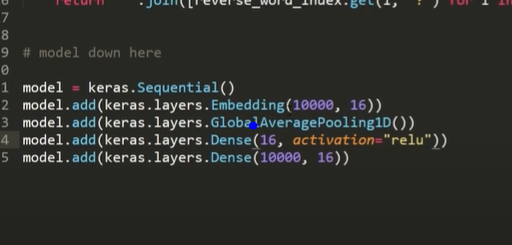

or this..

![alt text](image.png)

go here to understand image vectors. tldr great and good are different words and on a vector the could be represented as 2 or 4
but they are similar, but the computer doesnt know that so what we want to do is for it to use context like the other words in the string
like the 1 and 3 a and day are being used so the words might be similar. but you can go back to understand.

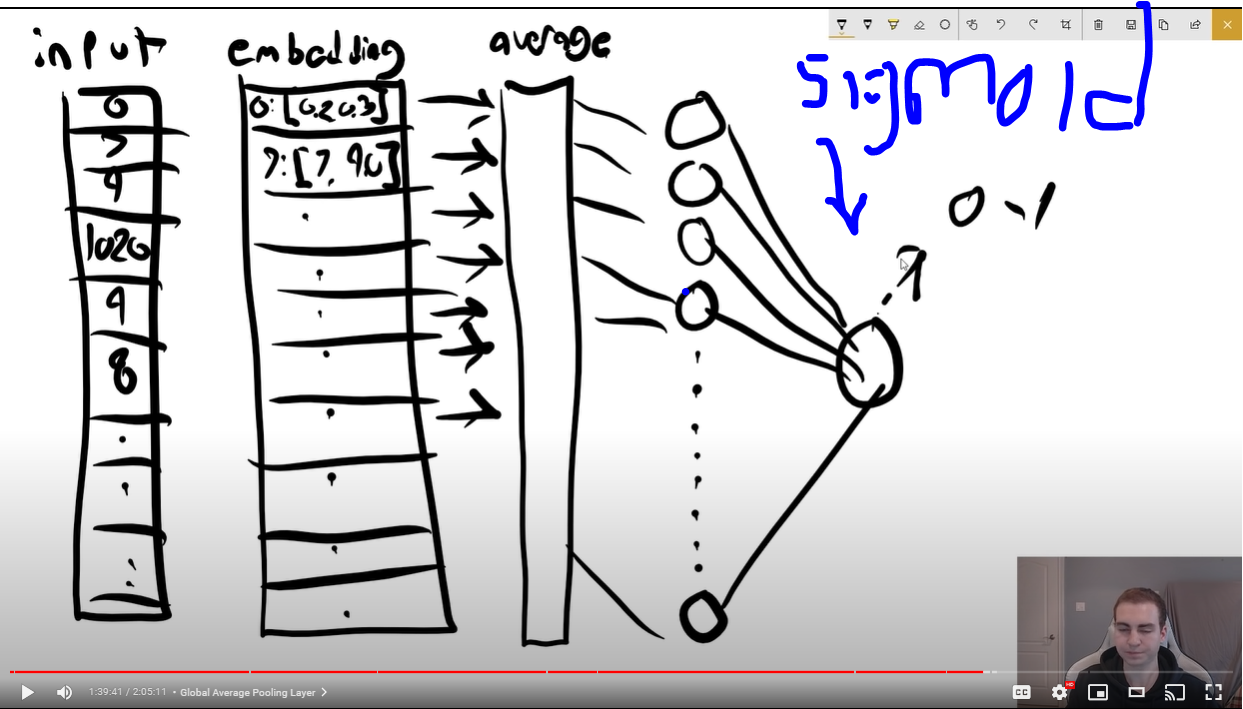

how it is supposed to look

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])#learn bainry crossentropy

#split data into 2 sets so that we can train it twice
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=((x_val, y_val)), verbose=1)

results = model.evaluate(test_data, test_labels)

In [ ]:
print(results)


testing the data now

In [ ]:
print("Rewiew: "+ "\n "+ decode_review(test_data[0]))

test_review = test_data[0]
print(len(test_review))
predict = model.predict([test_review])
print("prediction "+ str(predict[0]))
print("actual: " + str(test_labels[0]))
#print(results)


saving a model

In [ ]:
model.save("model.h5")

Using th model

In [ ]:
mdoel= keras.metrics.load_model("model.h5")

In [ ]:
def review_encode(s):
    encoded =[1]
    for word in s:
        if word.lower() in word_index:
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)
    return encoded

with open("test.txt", encoding="utf-8") as f:
    for line in f.readlines():
        nline = line.replace(",", "").replace(".", "").replace("()", "")#etc and ) and : and \
        encode = review_encode(nline)
        encode = keras.preprocessing.dequence.pad_sequence([encode], value= word_index['<PAD>'], padding="post",maxlen=250 )
        predict = model.predict(encode)
        print(line)
        print(encode)
        print(predict[0])